In [130]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [131]:
## Set options for displaying Pandas DataFrames
pd.options.display.max_columns = 80
pd.options.display.max_rows = 80

## OBTAIN
Import data file

In [132]:
## Read in and preview dataset
data = pd.read_csv('Data/cell2cell_data.csv')
data = data.drop(columns=['Sample'])
data.head()

,Revenue,Mou,Recchrge,Directas,Overage,Roam,Changem,Changer,Dropvce,Blckvce,Unansvce,Custcare,Threeway,Mourec,Outcalls,Incalls,Peakvce,Opeakvce,Dropblk,Callfwdv,Callwait,Months,Uniqsubs,Actvsubs,Csa,Phones,Models,Eqpdays,Customer,Age1,Age2,Children,Credita,Creditaa,Creditb,Creditc,Creditde,Creditgy,Creditz,Prizmrur,Prizmub,Prizmtwn,Refurb,Webcap,Truck,Rv,Occprof,Occcler,Occcrft,Occstud,Occhmkr,Occret,Occself,Ownrent,Marryun,Marryyes,Marryno,Mailord,Mailres,Mailflag,Travel,Pcown,Creditcd,Retcalls,Retaccpt,Newcelly,Newcelln,Refer,Incmiss,Income,Mcycle,Creditad,Setprcm,Setprc,Retcall,Churn
0,23.9975,219.25,22.50,0.2475,0.0,0.0,-157.25,-18.9975,0.666667,0.666667,6.333333,0.000000,0.0,97.176667,0.000000,0.000000,58.000000,24.000000,1.333333,0.0,0.333333,61,2,1,SEAPOR503,2,2,361,1000001,62.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,4,0,0,0,29.989990,1,1
1,16.9900,10.25,16.99,0.0000,0.0,0.0,-4.25,0.0000,0.333333,0.000000,2.666667,0.000000,0.0,0.000000,0.000000,0.000000,5.000000,1.000000,0.333333,0.0,0.000000,58,1,1,PITHOM412,2,1,1504,1000003,40.0,42.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,5,0,0,0,29.989990,0,1
2,38.0000,7.50,38.00,0.0000,0.0,0.0,-1.50,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.413333,0.333333,0.000000,1.333333,3.666667,0.000000,0.0,0.000000,60,1,1,MILMIL414,1,1,1812,1000004,26.0,26.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,6,0,0,1,0.000000,0,0
3,55.2300,570.50,71.98,0.0000,0.0,0.0,38.50,0.0000,9.666667,0.666667,77.000000,8.666667,0.0,106.330000,14.666667,0.666667,97.333333,90.333333,10.333333,0.0,0.000000,57,1,1,NNYSYR315,6,4,434,1000005,56.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,6,0,2,0,79.989990,0,0
4,17.1450,0.00,16.99,0.0000,0.0,0.0,0.00,-0.1550,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,53,2,2,OKCTUL918,4,3,852,1000007,46.0,54.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,9,0,1,0,9.989998,0,1


In [133]:
## Examine descriptive statistics
data.describe()

,Revenue,Mou,Recchrge,Directas,Overage,Roam,Changem,Changer,Dropvce,Blckvce,Unansvce,Custcare,Threeway,Mourec,Outcalls,Incalls,Peakvce,Opeakvce,Dropblk,Callfwdv,Callwait,Months,Uniqsubs,Actvsubs,Phones,Models,Eqpdays,Customer,Age1,Age2,Children,Credita,Creditaa,Creditb,Creditc,Creditde,Creditgy,Creditz,Prizmrur,Prizmub,Prizmtwn,Refurb,Webcap,Truck,Rv,Occprof,Occcler,Occcrft,Occstud,Occhmkr,Occret,Occself,Ownrent,Marryun,Marryyes,Marryno,Mailord,Mailres,Mailflag,Travel,Pcown,Creditcd,Retcalls,Retaccpt,Newcelly,Newcelln,Refer,Incmiss,Income,Mcycle,Creditad,Setprcm,Setprc,Retcall,Churn
count,39858.000000,39859.00000,39859.000000,39859.000000,39859.000000,39859.000000,39639.000000,39627.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,4.000000e+04,39294.000000,39294.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,58.634114,513.97351,46.271960,0.878711,40.863133,1.228694,-15.006928,-0.939621,5.940213,4.030525,27.771762,1.778229,0.284450,112.157275,24.836208,7.993717,88.685446,66.074487,10.046646,0.009167,1.790696,18.831750,1.551675,1.35925,1.788325,1.543400,392.839500,1.049981e+06,31.062427,21.016746,0.244325,0.171550,0.377100,0.167875,0.101700,0.11815,0.022200,0.041425,0.049800,0.318825,0.149300,0.144725,0.894900,0.187400,0.081625,0.173550,0.020025,0.029150,0.007300,0.003025,0.014225,0.017850,0.335125,0.388350,0.365325,0.246325,0.357225,0.372425,0.015075,0.057075,0.185325,0.675825,0.044025,0.020425,0.193100,0.140600,0.047850,0.252650,4.330900,0.013950,0.051525,0.575925,34.976005,0.040425,0.500000
std,44.142009,524.75989,23.714145,2.072555,98.272111,8.329852,259.646507,39.766798,8.880774,10.495103,38.250252,5.175107,1.074865,165.082658,34.764911,16.611850,102.933661,91.916943,15.348324,0.472957,5.375079,9.624604,1.314600,0.68480,1.319891,0.893553,256.715982,2.879733e+04,22.057552,23.810636,0.429692,0.376994,0.484666,0.373760,0.302257,0.32279,0.147335,0.199274,0.217534,0.466027,0.356388,0.351828,0.306686,0.390237,0.273796,0.378727,0.140087,0.168229,0.085129,0.054917,0.118419,0.132408,0.472040,0.487381,0.481527,0.430875,0.479188,0.483457,0.121853,0.231989,0.388566,0.468072,0.224584,0.150693,0.394736,0.347613,0.249223,0.434537,3.144329,0.117285,0.343909,0.494208,56.620460,0.196956,0.500006
min,-5.862500,0.00000,-11.290000,0.000000,0.000000,0.000000,-2867.500000,-851.105000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.00000,1.000000,1.000000,-5.000000,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.370000,151.25000,30.000000,0.000000,0.000000,0.000000,-87.500000,-7.141250,0.666667,0.000000,5.000000,0.000000,0.000000,7.606667,3.000000,0.000000,21.666667,10.333333,1.666667,0.000000,0.000000,11.000000,1.000000,1.00000,1.000000,1.000000,212.000000,1.025206e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [134]:
## Examine metadata for DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 76 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Revenue   39858 non-null  float64
 1   Mou       39859 non-null  float64
 2   Recchrge  39859 non-null  float64
 3   Directas  39859 non-null  float64
 4   Overage   39859 non-null  float64
 5   Roam      39859 non-null  float64
 6   Changem   39639 non-null  float64
 7   Changer   39627 non-null  float64
 8   Dropvce   40000 non-null  float64
 9   Blckvce   40000 non-null  float64
 10  Unansvce  40000 non-null  float64
 11  Custcare  40000 non-null  float64
 12  Threeway  40000 non-null  float64
 13  Mourec    40000 non-null  float64
 14  Outcalls  40000 non-null  float64
 15  Incalls   40000 non-null  float64
 16  Peakvce   40000 non-null  float64
 17  Opeakvce  40000 non-null  float64
 18  Dropblk   40000 non-null  float64
 19  Callfwdv  40000 non-null  float64
 20  Callwait  40000 non-null  fl

In [153]:
## Read in and preview documentation of variables
doc = pd.read_csv('Data/cell2cell_doc.csv')
doc.head()

,position,type,subtype,variable,description,var_type
0,1,Behavior,Spending,Revenue,Mean monthly revenue,num
1,2,Behavior,Usage,Mou,Mean monthly minutes of use,num
2,3,Behavior,Spending,Recchrge,Mean total recurring charge,num
3,4,Behavior,Usage,Directas,Mean number of director assisted calls,num
4,5,Behavior,Usage,Overage,Mean overage minutes of use,num


In [136]:
def check_unique(col, df, dropna=False):
    
    """Takes in a Pandas DataFrame and specific column name and returns a Pandas DataFrame 
    displaying the unique values in that column as well as the count of each unique value. 
    Default is to also provide a count of NaN values.
    
    Args:
        col (str): Name of the column you want to check.
        df (Pandas DataFrame): DataFrame containing the column to check the unique values of.
        dropna (bool, default=False): Whether or not to drop null values from list of values.
    
    Returns:
        DataFrame: Pandas DataFrame with columns for the unique values in the specified column, 
            the number of occurrences of each unique value in that column, and the percentage of 
            the column made up by each unique value.
    
    Example:
        >>> df = pd.DataFrame({'a': [2, 4, 4, 6],
                               'b': [2, 1, 3, 4]})

        >>> check_unique(col='a', df, dropna=False)
        
            count   %
        4   2   0.50
        6   1   0.25
        2   1   0.25
    """
    
    import pandas as pd
    
    unique_vals = pd.DataFrame()
    unique_vals['count'] = pd.Series(df[col].value_counts(dropna=dropna))
    unique_vals['%'] = pd.Series(round(df[col].value_counts(normalize=True, dropna=dropna)*100, 2))
    
    display(unique_vals.style.set_caption(col))


In [137]:
def plot_bar(feature, data, target='Churn', hue='Churn', show_legend=False):
    
    """Takes in a feature/ column name, the DataFrame containing the column, and the target variable
       and returns a barplot for that feature grouped by churn status.
    """
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(7,5))
    fig = sns.barplot(x=target,
                      y=feature,
                      palette='nipy_spectral',
                      hue=hue,
                      data=data)
    fig.set_title('Churn vs {}'.format(feature), fontsize=16, weight='bold')
    fig.set_xlabel('Churn', fontsize=14, weight='bold')
    fig.set_ylabel(feature, fontsize=14, weight='bold')
    
    if show_legend==False:
        fig.get_legend().remove()
    
    return fig

In [138]:
## No duplicate customer ids
data['Customer'].nunique()

40000

In [139]:
## Check for class imbalance
check_unique('Churn', data) # 50/50 split

,count,%
0,20000,50.000000
1,20000,50.000000


In [140]:
## Check number of communication service areas
data['Csa'].nunique()

733

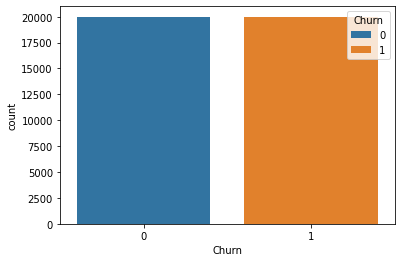

In [82]:
sns.countplot(x='Churn', data=data, hue='Churn', dodge=False);

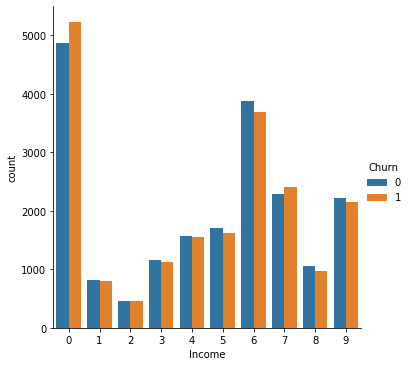

In [87]:
sns.catplot(x='Income', hue='Churn', data=data, kind='count')

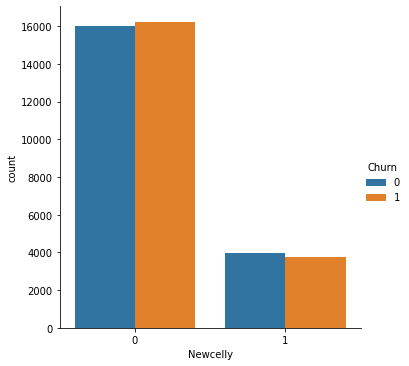

In [89]:
sns.catplot(x='Newcelly', hue='Churn', data=data, kind='count')

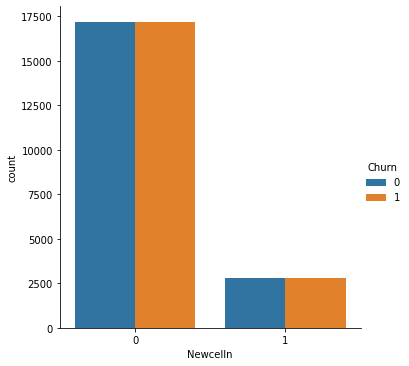

In [90]:
sns.catplot(x='Newcelln', hue='Churn', data=data, kind='count')

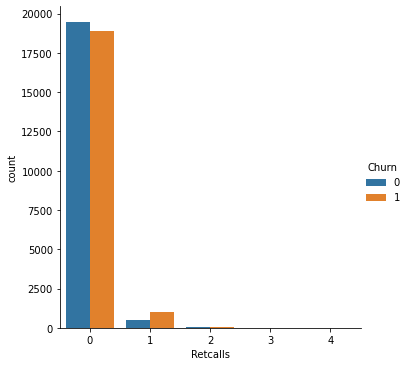

In [91]:
sns.catplot(x='Retcalls', hue='Churn', data=data, kind='count')

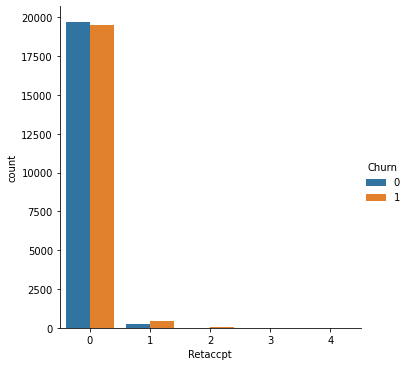

In [92]:
sns.catplot(x='Retaccpt', hue='Churn', data=data, kind='count')

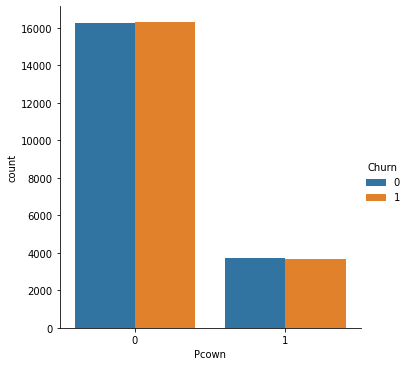

In [93]:
sns.catplot(x='Pcown', hue='Churn', data=data, kind='count')

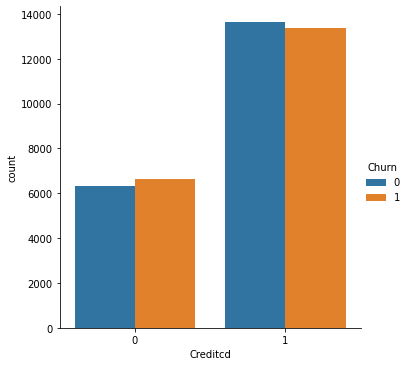

In [94]:
sns.catplot(x='Creditcd', hue='Churn', data=data, kind='count')

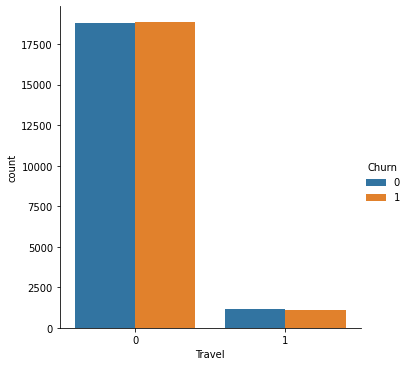

In [95]:
sns.catplot(x='Travel', hue='Churn', data=data, kind='count')

/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


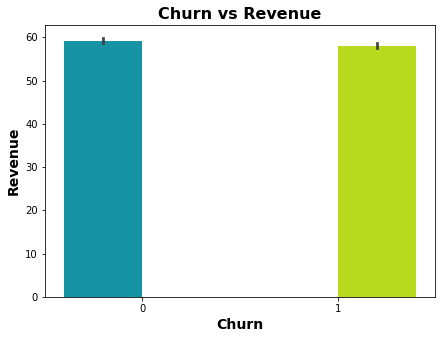

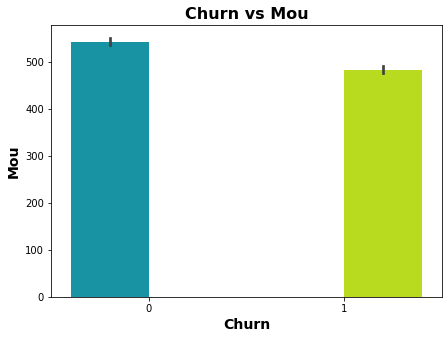

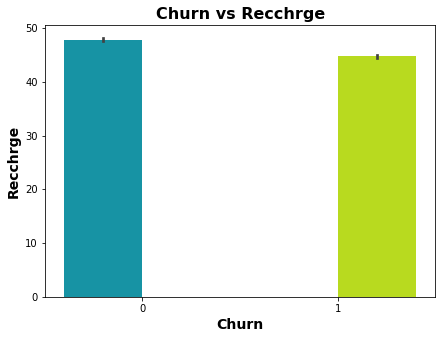

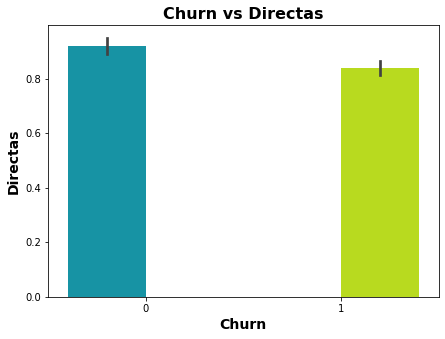

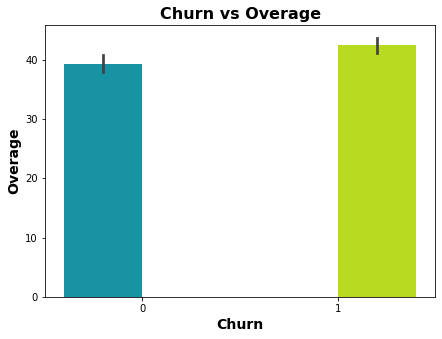

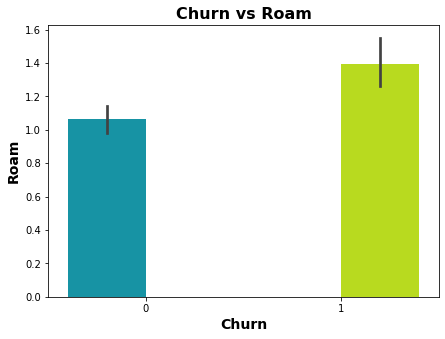

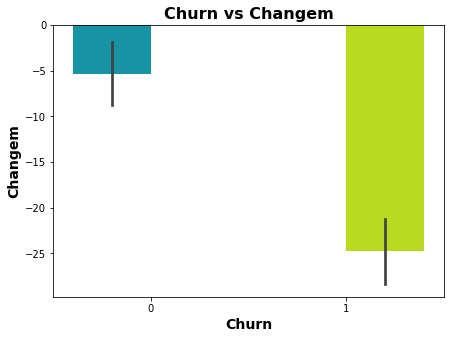

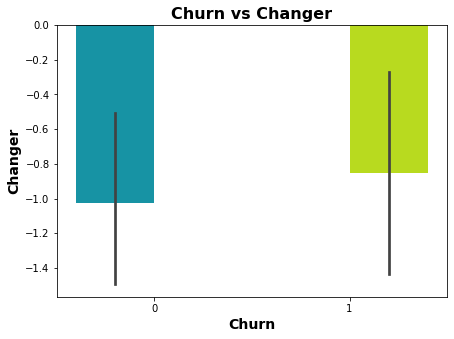

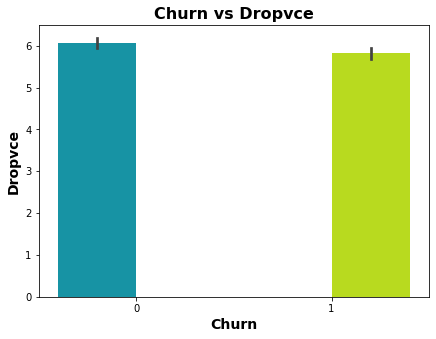

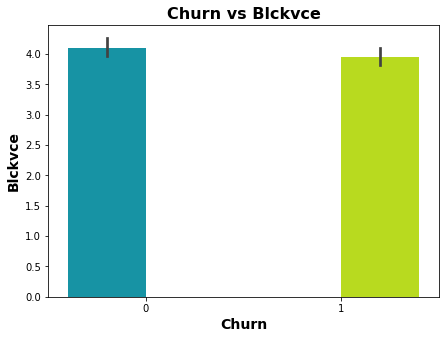

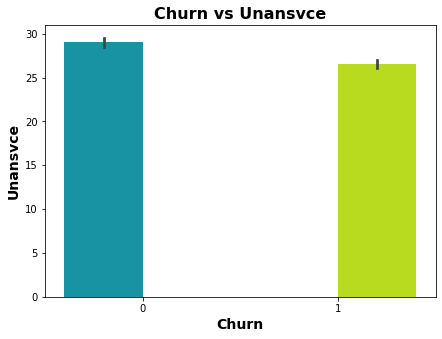

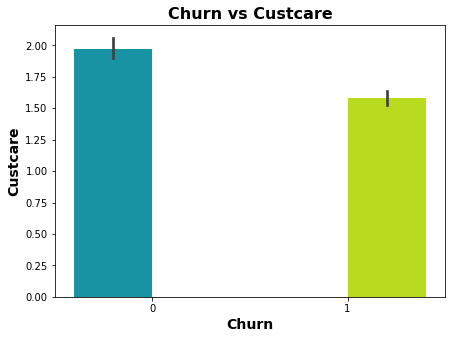

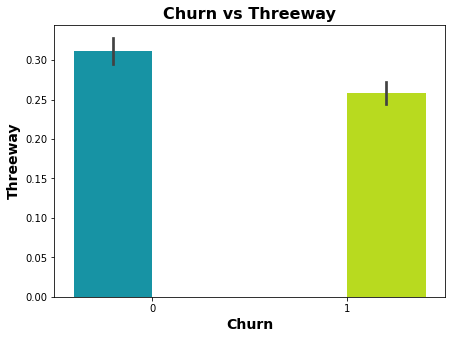

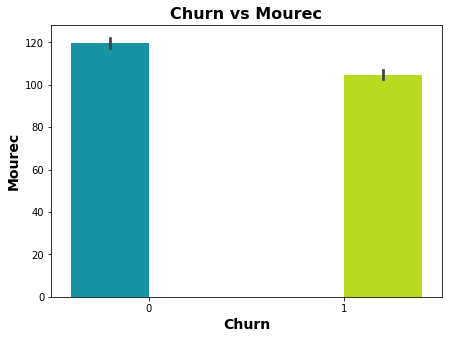

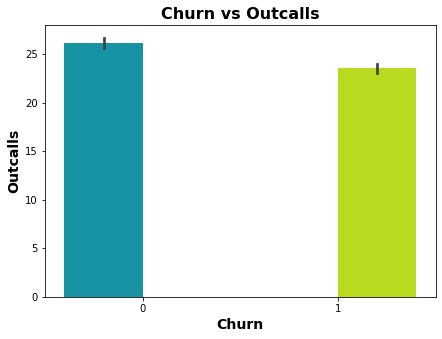

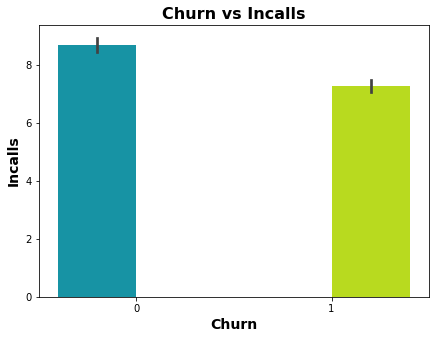

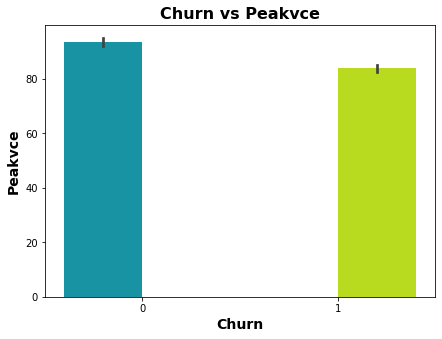

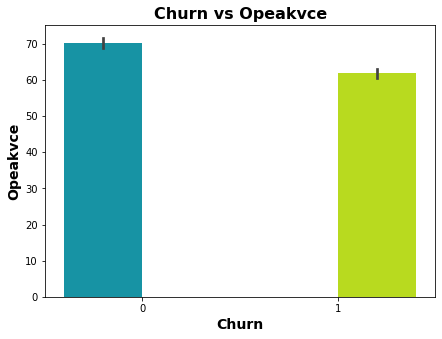

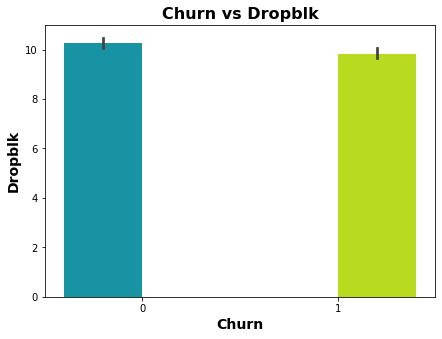

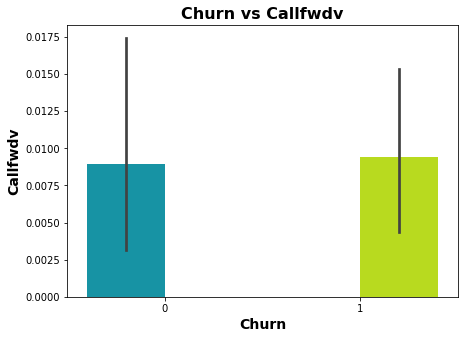

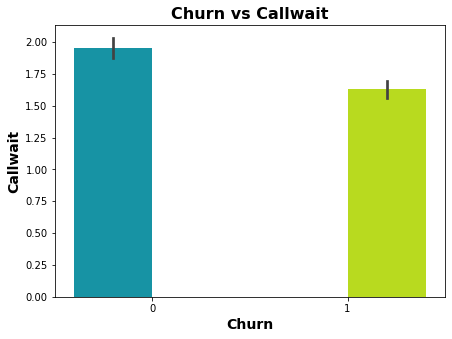

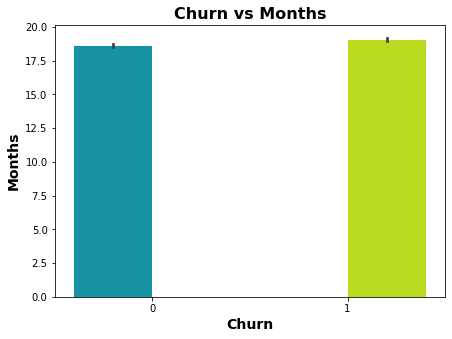

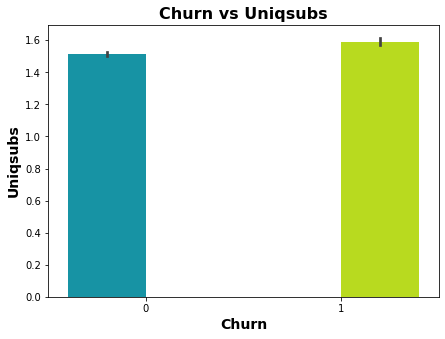

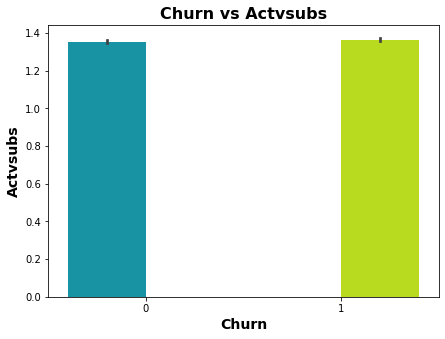

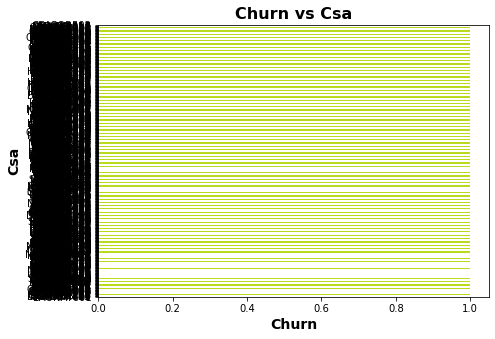

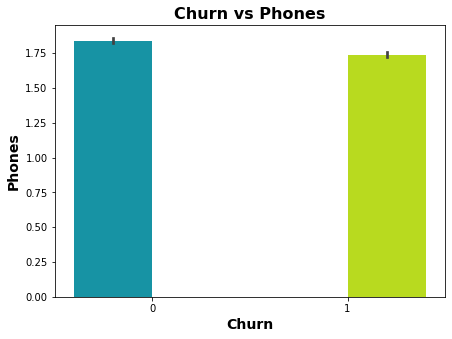

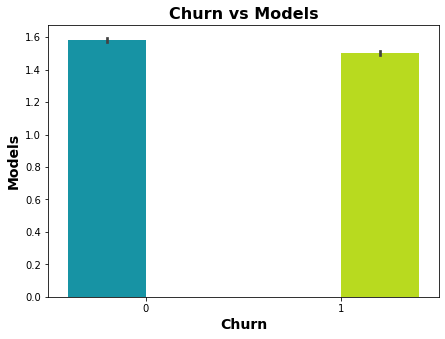

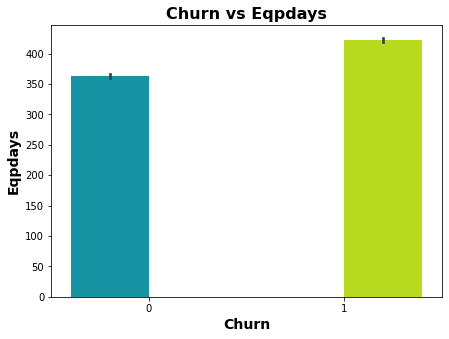

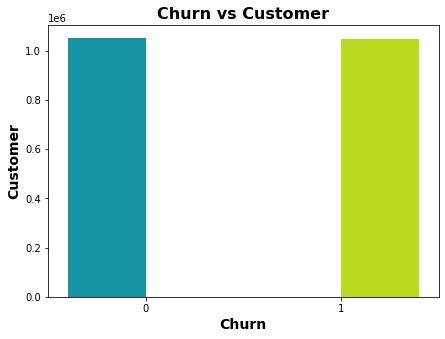

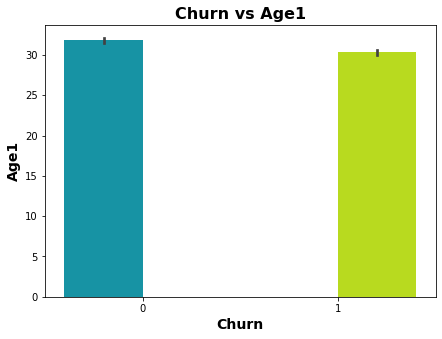

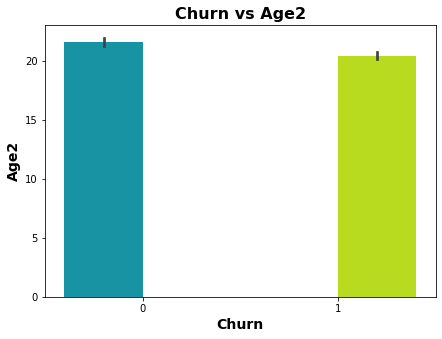

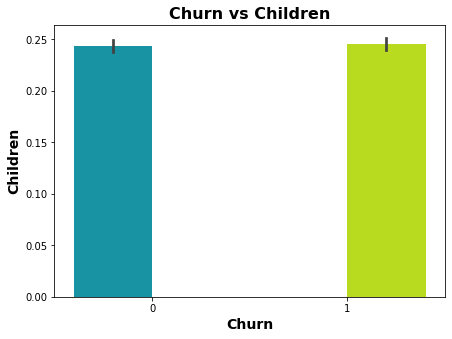

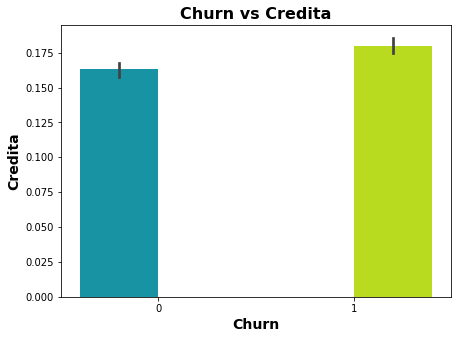

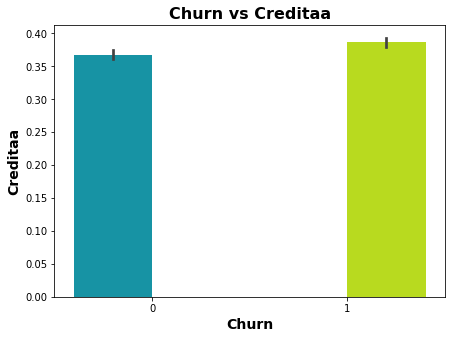

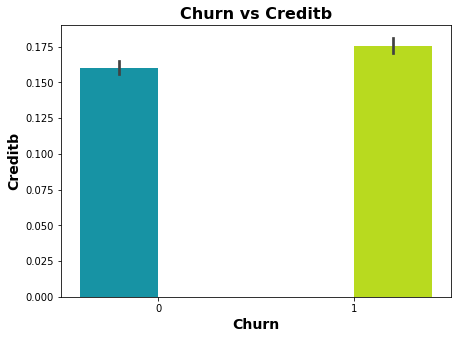

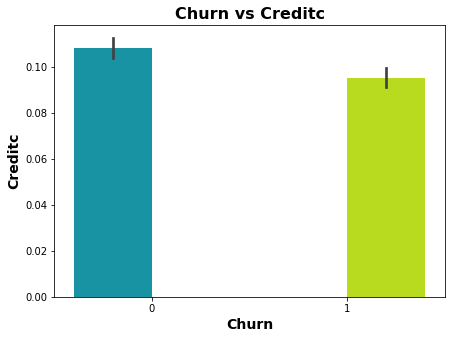

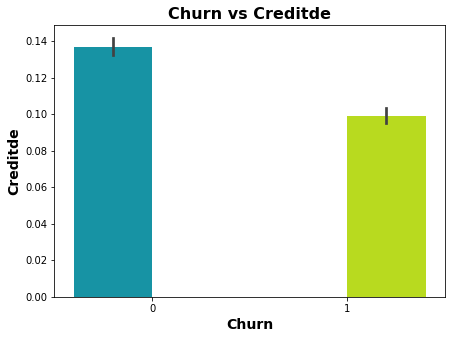

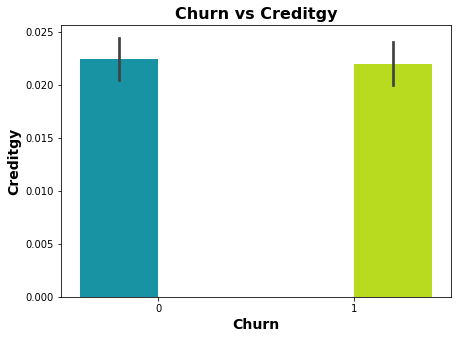

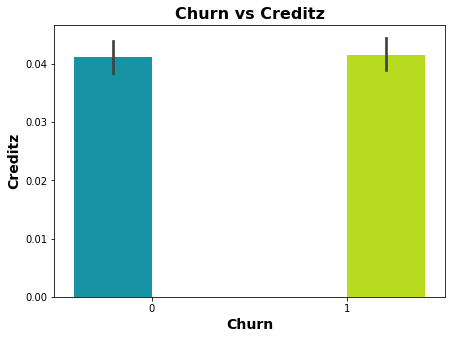

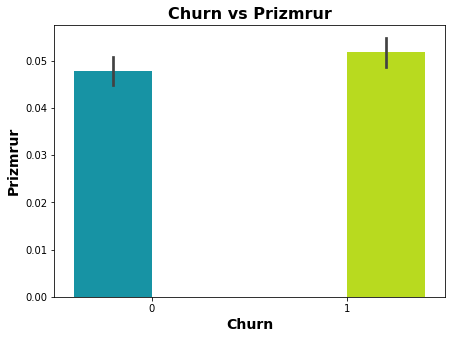

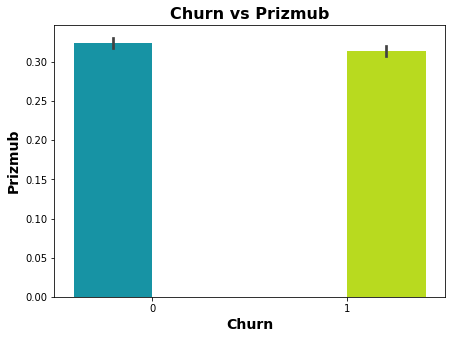

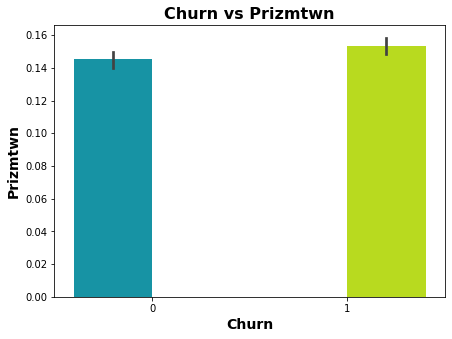

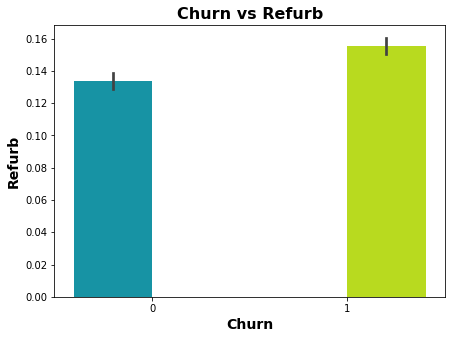

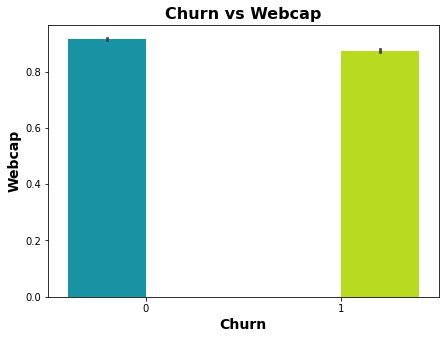

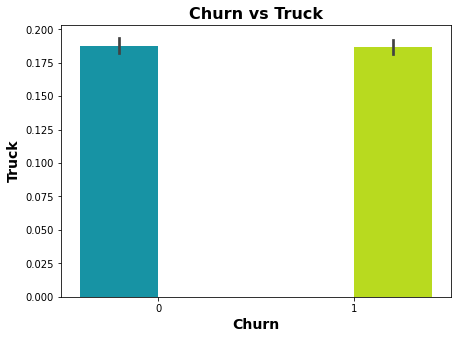

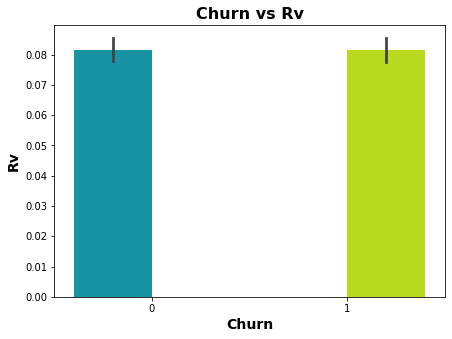

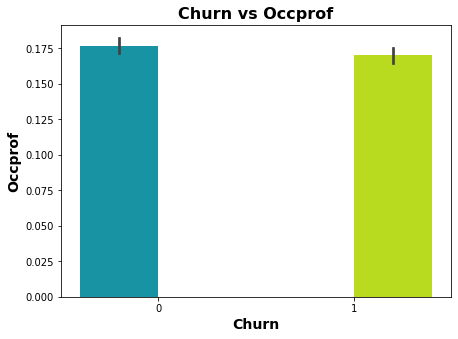

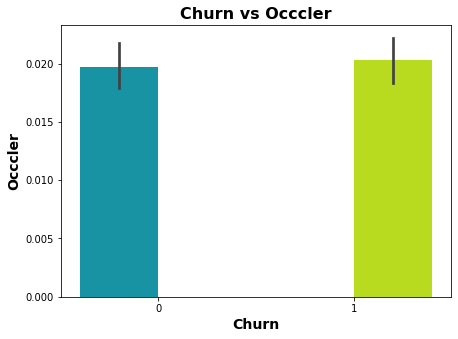

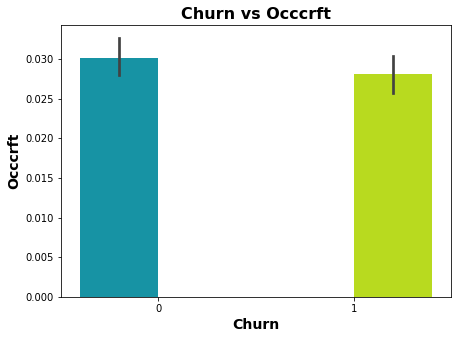

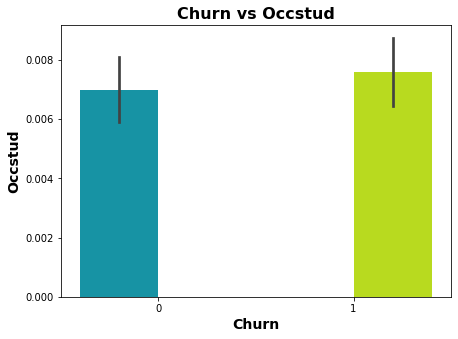

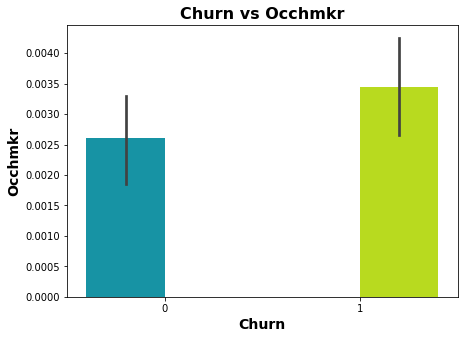

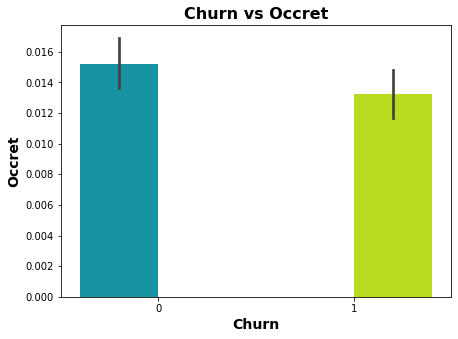

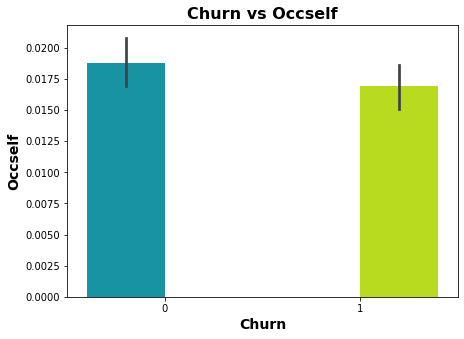

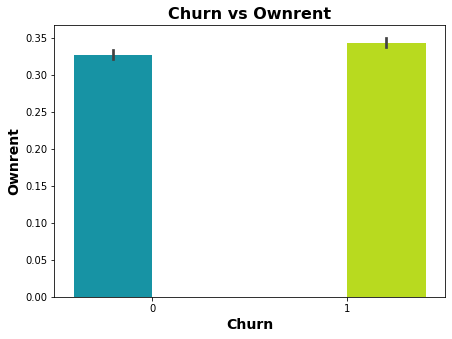

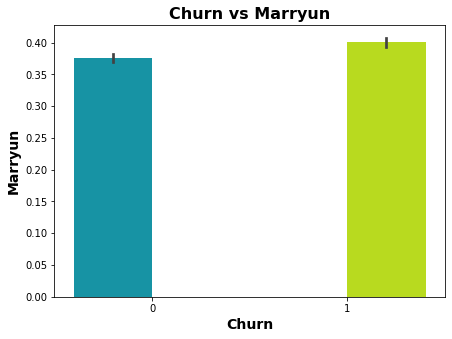

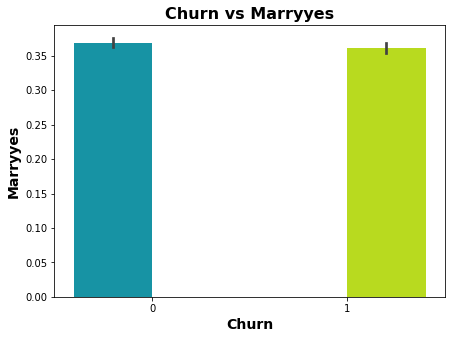

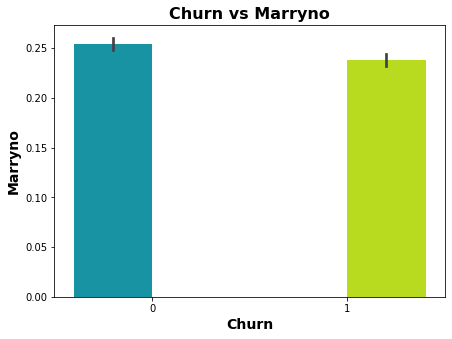

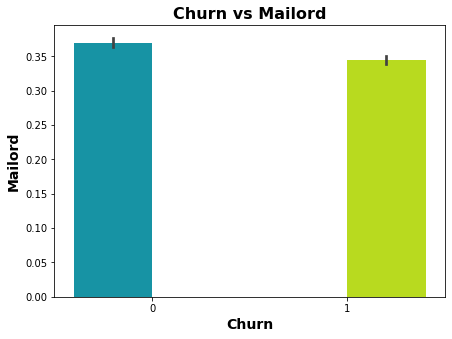

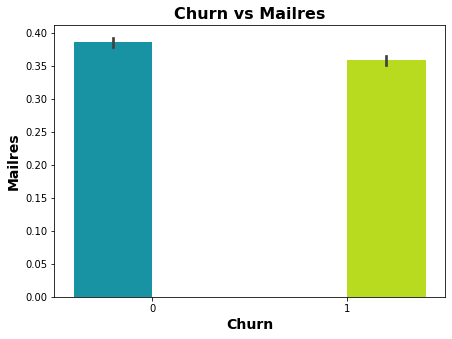

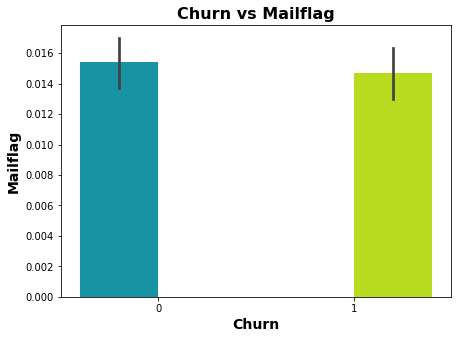

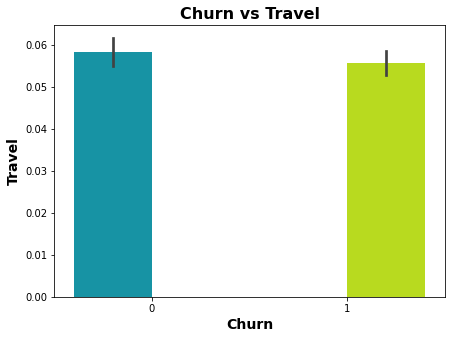

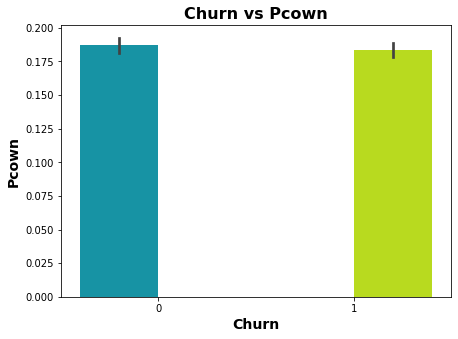

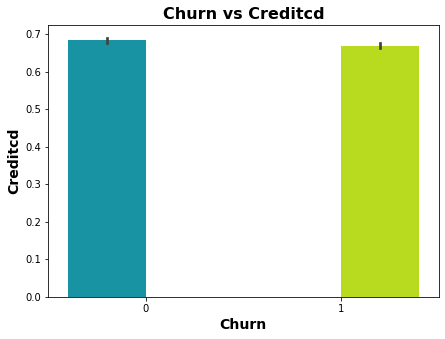

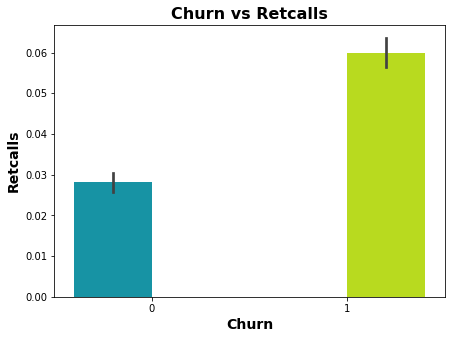

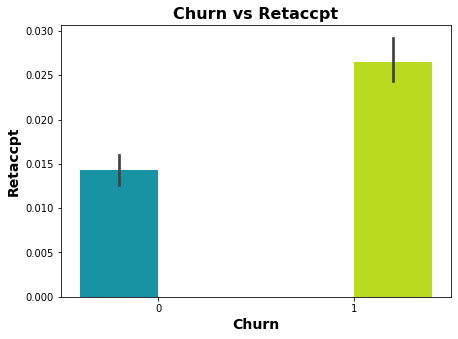

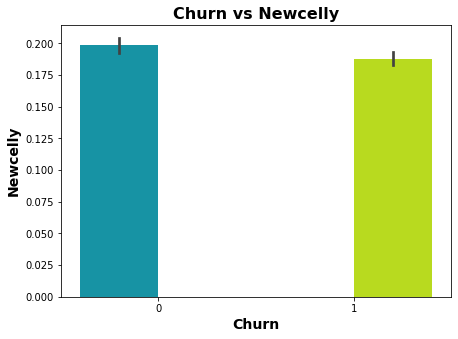

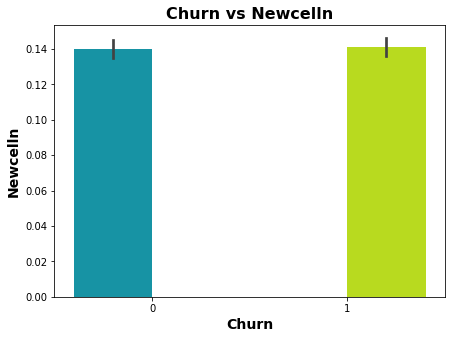

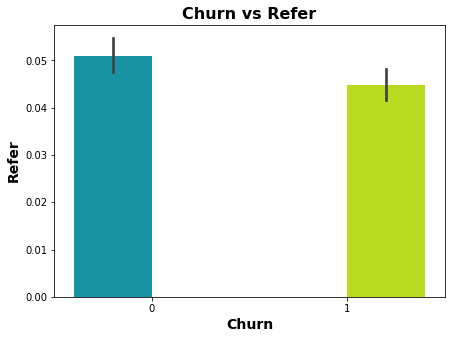

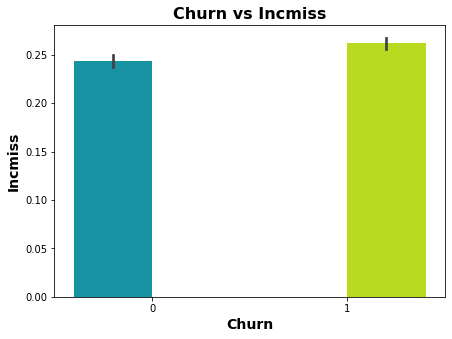

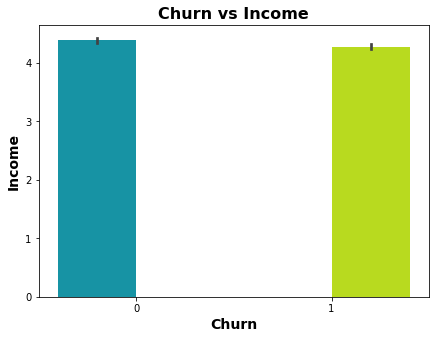

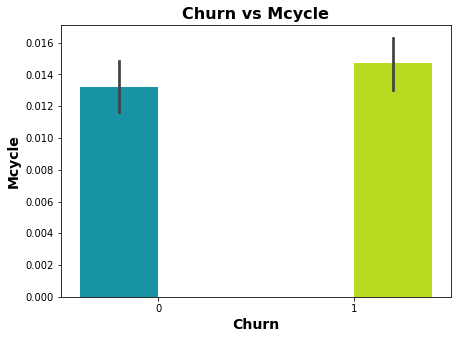

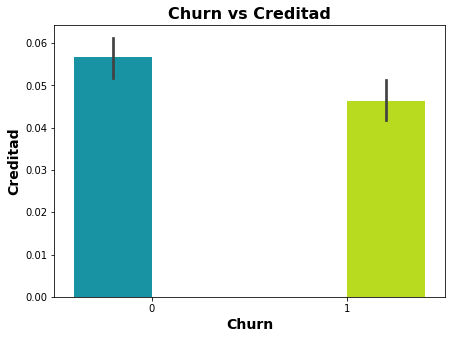

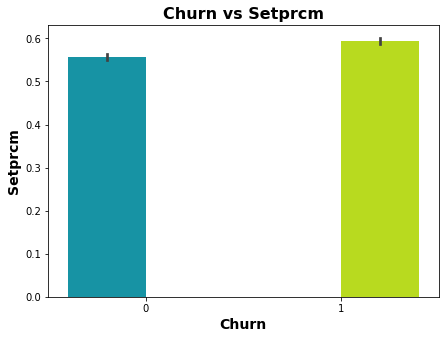

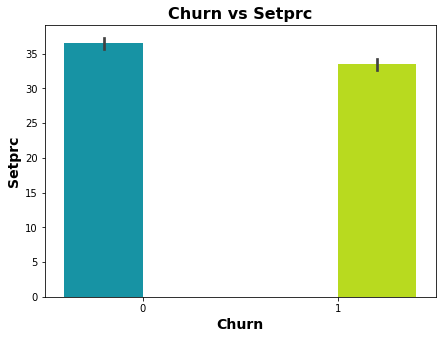

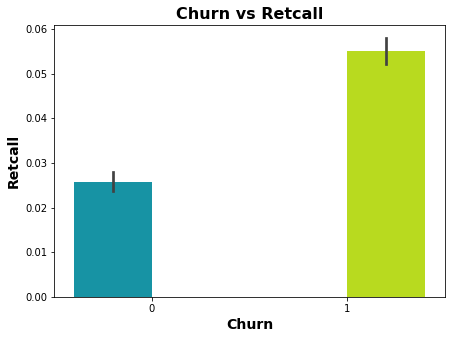

In [76]:
for col in data.columns[:-1]:
    plot_bar(col, data);

In [51]:
check_unique('Income', data)

,count,%
0,10106,25.260000
6,7564,18.910000
7,4699,11.750000
9,4370,10.920000
5,3318,8.300000
4,3120,7.800000
3,2270,5.680000
8,2042,5.100000
1,1609,4.020000
2,902,2.260000


In [79]:
## Very little variation -- zero-inflated variable
check_unique('Refer', data)

,count,%
0,38250,95.620000
1,1654,4.140000
2,66,0.160000
3,16,0.040000
4,5,0.010000
5,3,0.010000
6,3,0.010000
7,1,0.000000
9,1,0.000000
11,1,0.000000


In [80]:
check_unique('Retcalls', data)

,count,%
0,38383,95.960000
1,1493,3.730000
2,107,0.270000
3,14,0.030000
4,3,0.010000


In [81]:
check_unique('Retaccpt', data)

,count,%
0,39228,98.070000
1,735,1.840000
2,30,0.080000
3,6,0.020000
4,1,0.000000


<AxesSubplot:xlabel='Months', ylabel='Count'>

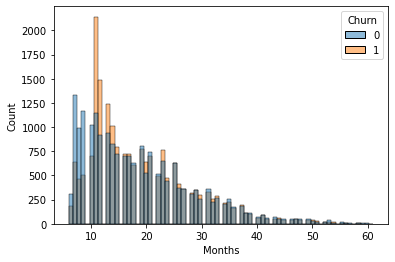

In [24]:
sns.histplot(x='Months', hue='Churn', data=data)

<AxesSubplot:xlabel='Eqpdays', ylabel='Count'>

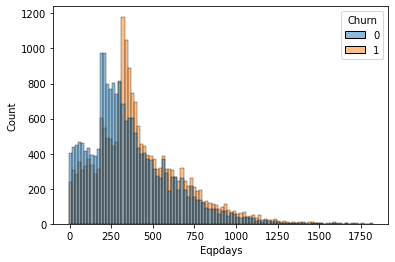

In [25]:
sns.histplot(x='Eqpdays', hue='Churn', data=data)

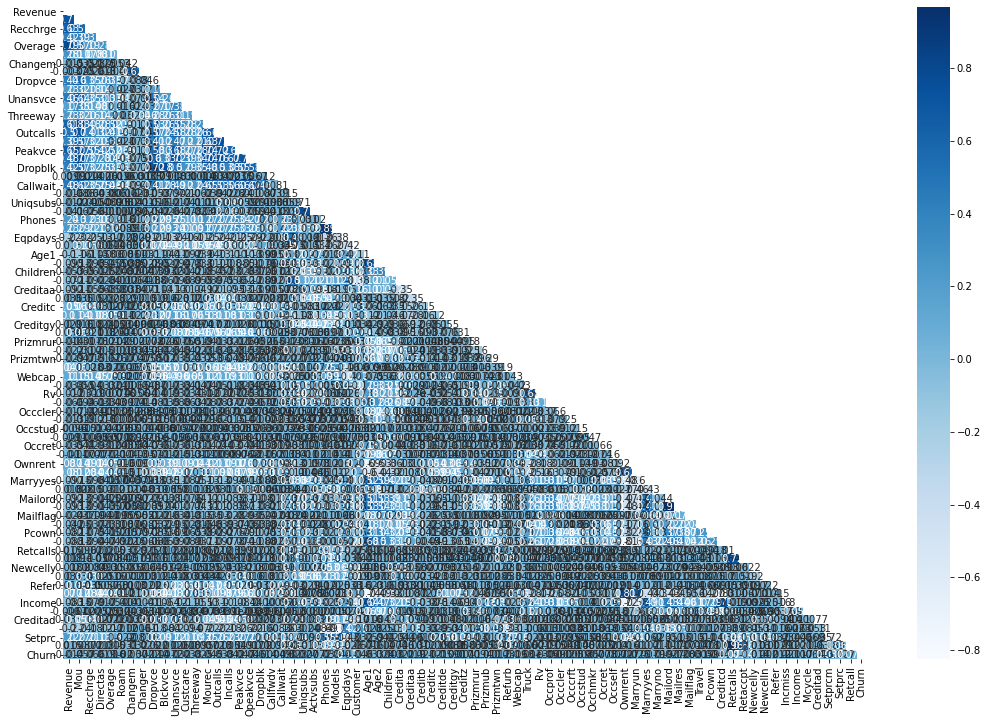

In [69]:
## Plot correlations among variables as an annotated heatmap
corr = data.corr()
mask = np.zeros_like(corr)
## Mask the correlations of the variables with themselves along the diagonal and all duplicate
 ## correlations to the right of that line
mask[np.triu_indices_from(mask)] = True
mask
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, cmap='Blues', mask=mask);

In [72]:
abs_corr = data.corr().abs()
cmap = 'Blues'
abs_corr.style.background_gradient(cmap, axis=1)

In [141]:
## Get the credit score column names into a single list
credit_cols = [col for col in data.columns if 'Credit' in col]
# Drop non-credit-score columns from list
credit_cols.remove('Creditcd')
credit_cols.remove('Creditad')
credit_cols

['Credita',
 'Creditaa',
 'Creditb',
 'Creditc',
 'Creditde',
 'Creditgy',
 'Creditz']

In [142]:
## Convert credit score variables so they can be ranked as a single variable
data['Creditz'] = np.where(data['Creditz']==1, 1, 0)
data['Creditgy'] = np.where(data['Creditgy']==1, 2, 0)
data['Creditde'] = np.where(data['Creditde']==1, 3, 0)
data['Creditc'] = np.where(data['Creditc']==1, 4, 0)
data['Creditb'] = np.where(data['Creditb']==1, 5, 0)
data['Creditaa'] = np.where(data['Creditaa']==1, 6, 0)
data['Credita'] = np.where(data['Credita']==1, 7, 0)

## Sum across 'Credit..' columns to get single 'Credit' variable
data['Credit'] = data[credit_cols].sum(axis=1)
data['Credit'].value_counts()

6    15084
7     6862
5     6715
3     4726
4     4068
1     1657
2      888
Name: Credit, dtype: int64

In [143]:
## Convert 'Refer' into a binary variable
data['Refery'] = np.where(model_data['Refer']==0, 0, 1)

In [146]:
model_data = data[['Mou', 'Recchrge', 'Roam', 'Changem', 'Custcare',
                   'Outcalls', 'Incalls', 'Months', 'Csa', 'Eqpdays',
                   'Age1', 'Credit', 'Refurb', 'Occprof', 'Occstud', 
                   'Occhmkr', 'Occret', 'Occself', 'Refery', 'Income',
                   'Churn']]

In [147]:
model_data.describe()

,Mou,Recchrge,Roam,Changem,Custcare,Outcalls,Incalls,Months,Eqpdays,Age1,Credit,Refurb,Occprof,Occstud,Occhmkr,Occret,Occself,Refery,Income,Churn
count,39859.00000,39859.000000,39859.000000,39639.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,39294.000000,40000.0000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,513.97351,46.271960,1.228694,-15.006928,1.778229,24.836208,7.993717,18.831750,392.839500,31.062427,5.1499,0.144725,0.173550,0.007300,0.003025,0.014225,0.017850,0.043750,4.330900,0.500000
std,524.75989,23.714145,8.329852,259.646507,5.175107,34.764911,16.611850,9.624604,256.715982,22.057552,1.5741,0.351828,0.378727,0.085129,0.054917,0.118419,0.132408,0.204541,3.144329,0.500006
min,0.00000,-11.290000,0.000000,-2867.500000,0.000000,0.000000,0.000000,6.000000,-5.000000,0.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.25000,30.000000,0.000000,-87.500000,0.000000,3.000000,0.000000,11.000000,212.000000,0.000000,4.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,356.50000,44.990000,0.000000,-6.250000,0.000000,13.000000,2.000000,17.000000,342.000000,36.000000,6.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.500000
75%,702.50000,59.990000,0.235000,63.000000,1.333333,33.000000,8.666667,24.000000,532.000000,48.000000,6.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,7667.75000,349.572500,850.862500,5192.250000,365.666667,610.333333,519.333333,61.000000,1823.000000,99.000000,7.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000


In [149]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mou       39859 non-null  float64
 1   Recchrge  39859 non-null  float64
 2   Roam      39859 non-null  float64
 3   Changem   39639 non-null  float64
 4   Custcare  40000 non-null  float64
 5   Outcalls  40000 non-null  float64
 6   Incalls   40000 non-null  float64
 7   Months    40000 non-null  int64  
 8   Csa       39983 non-null  object 
 9   Eqpdays   40000 non-null  int64  
 10  Age1      39294 non-null  float64
 11  Credit    40000 non-null  int64  
 12  Refurb    40000 non-null  int64  
 13  Occprof   40000 non-null  int64  
 14  Occstud   40000 non-null  int64  
 15  Occhmkr   40000 non-null  int64  
 16  Occret    40000 non-null  int64  
 17  Occself   40000 non-null  int64  
 18  Refery    40000 non-null  int64  
 19  Income    40000 non-null  int64  
 20  Churn     40000 non-null  in

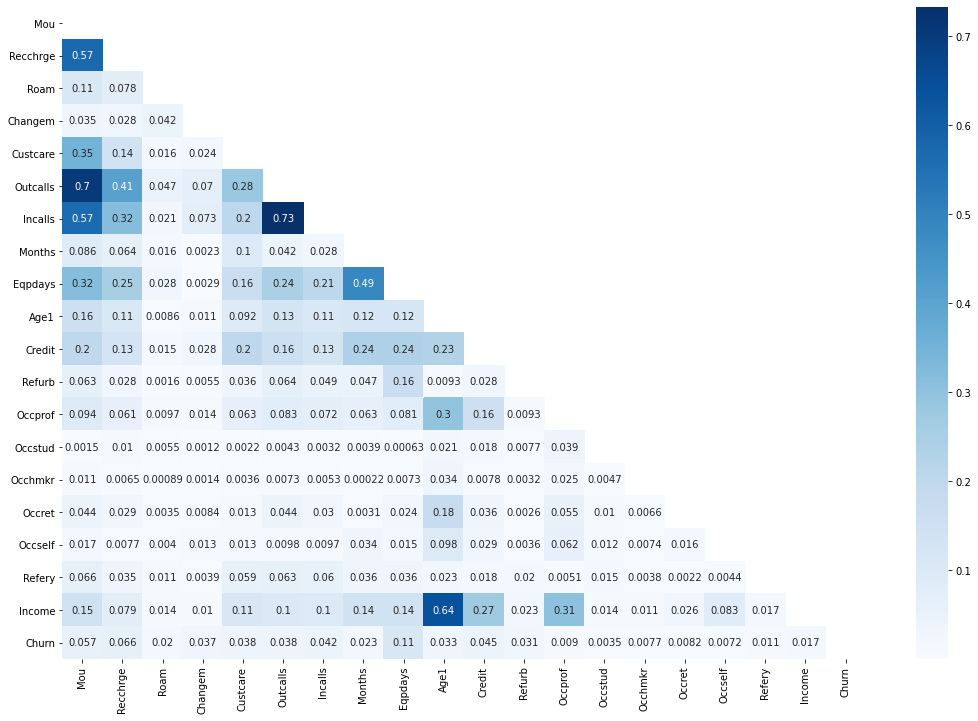

In [151]:
abs_corr = model_data.corr().abs()
mask = np.zeros_like(abs_corr)
## Mask the correlations of the variables with themselves along the diagonal and all duplicate
 ## correlations to the right of that line
mask[np.triu_indices_from(mask)] = True
mask
plt.figure(figsize=(18,12))
sns.heatmap(abs_corr, annot=True, cmap='Blues', mask=mask);